## GAF for cat and dog data

In [1]:
from pyts.image import GramianAngularField
from os import listdir, path
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

#### Loading Data

In [2]:
base_folder = 'data/cat_dog/train/'
cat_train = path.join(base_folder, 'cat/')
dog_train = path.join(base_folder, 'dog/')

cat_filepaths = [cat_train + str(f) for f in listdir(cat_train) if path.isfile(path.join(cat_train, f))]
dog_filepaths = [dog_train + str(f) for f in listdir(dog_train) if path.isfile(path.join(dog_train, f))]

print('cat train files: ' + str(len(cat_filepaths)))
print('dog train files: ' + str(len(dog_filepaths)))

cat train files: 125
dog train files: 85


c:\umdprojects\anaconda\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  if __name__ == '__main__':
c:\umdprojects\anaconda\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if __name__ == '__main__':
c:\umdprojects\anaconda\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  if sys.path[0] == '':
c:\umdprojects\anaconda\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if sys.path[0] == '':


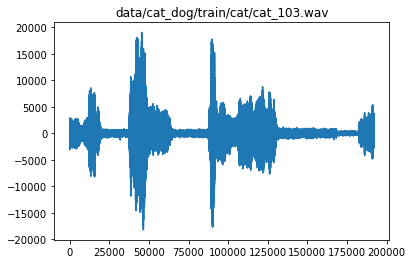

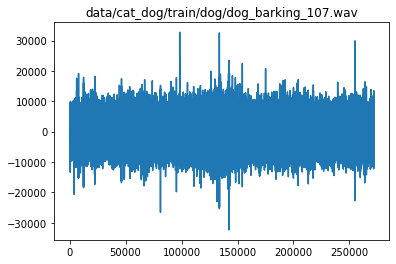

In [3]:
fpc = cat_filepaths[5]
fpd = dog_filepaths[10]

spf1 = wave.open(fpc, "r")
spf2 = wave.open(fpd, "r")

# Extract Raw Audio from Wav File
signal1 = spf1.readframes(-1)
signal1 = np.fromstring(signal1, "Int16")

signal2 = spf2.readframes(-1)
signal2 = np.fromstring(signal2, "Int16")

plt.figure(1)
plt.title(fpc)
plt.plot(signal1)
plt.show()

plt.figure(2)
plt.title(fpd)
plt.plot(signal2)
plt.show()

In [4]:
c_temp = []
for i in range(len(cat_filepaths)):
    spf = wave.open(cat_filepaths[i], "r")
    
    # Extract Raw Audio from Wav File
    signal = spf.readframes(-1)
    signal = np.fromstring(signal, "Int16")
    
    c_temp.append(signal)
    
d_temp = []
for i in range(len(dog_filepaths)):
    spf = wave.open(dog_filepaths[i], "r")
    
    # Extract Raw Audio from Wav File
    signal = spf.readframes(-1)
    signal = np.fromstring(signal, "Int16")
    
    d_temp.append(signal)
    

c:\umdprojects\anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  import sys
c:\umdprojects\anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys
c:\umdprojects\anaconda\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
c:\umdprojects\anaconda\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [5]:
#resizing to smallest length
c_rsz = []
for ele in c_temp:
    c_rsz.append(ele[0 : min(map(len, c_temp))])
    
d_rsz = []
for ele in d_temp:
    d_rsz.append(ele[0 : min(map(len, d_temp))])

cat_np = np.array(c_rsz) 
dog_np = np.array(d_rsz)

#### Convert to GAF image

cat and dog are numpy arrays where each element is an image

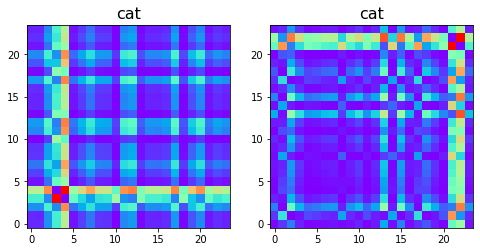

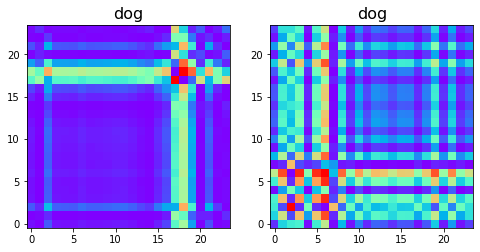

In [6]:
image_size = 24
gaf = GramianAngularField(image_size)

cat = gaf.fit_transform(cat_np)
dog = gaf.fit_transform(dog_np)

# Show the results for the first time series

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(cat[1], cmap='rainbow', origin='lower')
plt.title("cat", fontsize=16)
plt.subplot(1, 2, 2)
plt.imshow(cat[2], cmap='rainbow', origin='lower')
plt.title("cat", fontsize=16)
plt.show()


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(dog[1], cmap='rainbow', origin='lower')
plt.title("dog", fontsize=16)
plt.subplot(1, 2, 2)
plt.imshow(dog[2], cmap='rainbow', origin='lower')
plt.title("dog", fontsize=16)
plt.show()
